# Vecinos más cercanos (KNN)

*Presentado por: Gina Maritza Martinez Lopez*

Usamos el método de vecinos más cercanos para clasificación. Por un lado, analizamos el Iris Dataset sobre especies de flores. Por el otro lado analizamos la supervivencia en la tragedia del Titanic utilizando diferentes valores de K. 

Importamos primero las librerías y paquetes que utilizaremos. Puede importar otros si lo considera útil.

In [1]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Iris Dataset

Importamos el conjunto de datos desde sklearn.




In [2]:
#importar dataset
from sklearn.datasets import load_iris

In [3]:
#Importar iris dataset y separar en data y target
iris = load_iris()
X=pd.DataFrame(iris.data)
y=pd.DataFrame(iris.target)

Primero separamos el conjunto de datos en Train y Test, en una proporción de 70%, 30%.

In [10]:
#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, train_size=0.7, shuffle=True)

print('X_train : ')
print(X_train.shape)
 
print('')
print('X_test : ')
print(X_test.shape)
 
print('')
print('y_train : ')
print(y_train.shape)
 
print('')
print('y_test : ')
print(y_test.shape)



X_train : 
(105, 4)

X_test : 
(45, 4)

y_train : 
(105, 1)

y_test : 
(45, 1)


Importamos el classificador KNeighborsClassifier de SKLearn con el nombre *knn*. Usar k=3.


In [8]:
#TODO1 importar KNeighborsClassifier con k=3 con el nombre knn
knn = KNeighborsClassifier(n_neighbors=3)

Entrenamos el clasificador con los datos de entrenamiento.

In [14]:
#TODO2 entrenar knn con los datos de entrenamiento
knn.fit(X_train, y_train.to_numpy().reshape((-1,)))

KNeighborsClassifier(n_neighbors=3)

Calculamos la exactitud del modelo en los datos Test, con el método *score* del clasificador.

In [15]:
#TODO3 calcular la exactitud (score) del modelo en los datos test.
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


 Observe los diagramas de dispersión del Iris datset [aquí](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).¿Cree que la exactitud mejorará con un k más pequeño?¿Cree que mejorará con un K más grande? ¿Por qué?

Considero que la exactitud debe mejorar con un k mas grande por ejemplo con k=5, dado que si toma mas vecinos puede haber una mayor precisión en el modelo en relación a la cantidad de vecinos cercanos y la agrupación que se le va a dar. Si cogieramos un k menor el modelo no tendria una buena precisión.



## Titanic Dataset
Ahora analizamos la supervivencia en el naufragio del Titanic. El conjunto de datos, así como el diccionario de atributos, puede verlos [aquí](https://www.kaggle.com/competitions/titanic/data).

*Observación* Usaremos sólo el conjunto Train proporcionado en Kaggle para la fase Test y Train en el taller.

In [91]:
#importar los datos de entrenamiento del Titanic Dataset.
df=pd.read_csv("train.csv")

Eliminar del dataframe las filas con valores ausentes (NaN).

In [92]:
#TODO5 Remover filas con valores ausentes.
df=df.dropna()

Explorar el dataset mediante su visualización, el uso de los métodos *head*, *info* y *value_counts* para los Dataframes en pandas y sus columnas. ¿Qué tipo de variables tiene? qué caracteriza a los valores de dichas variables? ¿Qué tipos de datos es usan?

In [93]:
#TODO6 Explorar el dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [95]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

**TODO7**: ¿Cuáles cree que son las variables más relevantes para predecir la columna 'Survived'? ¿Por qué?

Considero que las variables mas relevantes para predecir si sobrevive o no son las columnas de Pclass porque queremos saber en que clase iba cada pasajero como tambien el Fare, por otro lado tenemos el sexo, la edad, SibSp  y Parch porque según tengo entendido fueron factores relevantes para que las personas se montaran en los botes donde evacuaron a las personas y eso es esencial para predecir la columna Survived.

In [96]:
#Separar la columna objetivo.
X=df.drop('Survived',axis=1)
y=df['Survived']

In [97]:
#TODO8 Remover columnas irrelevantes
X=X.drop(['PassengerId','Name', 'Ticket', 'Embarked'],axis=1)

Convertimos a dummies las columnas categóricas. Nos aseguramos de que las originales no permanezcan en la tabla.

In [98]:
#TODO9 Convertir a dummies. Asegurarse de eliminar las columnas originales. Se sugiere usar el parámetro drop_first=True si se está trabajando con getdummies.
X=pd.get_dummies(X,prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A16,Cabin_A20,Cabin_A23,Cabin_A24,...,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,54.0,0,0,51.8625,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3,4.0,1,1,16.7000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,58.0,0,0,26.5500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,1,33.0,0,0,5.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
879,1,56.0,0,1,83.1583,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,19.0,0,0,30.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#Imprimir info de X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Columns: 138 entries, Pclass to Cabin_T
dtypes: float64(2), int64(3), uint8(133)
memory usage: 32.3 KB


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, shuffle=True)

Ahora entrenamos clasificadores de KNN con diferentes valores de k y visualizamos el cambio entre ellos.

In [103]:
#TODO10 para k entre 1 y 100, entrenar knn en los datos de entrenamiento. Calcular sus respectivos scores
# Guardar los scores en una lista llamada "scores".
scores=[]
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.to_numpy().reshape((-1,)))
    scores.append(knn.score(X_test, y_test))

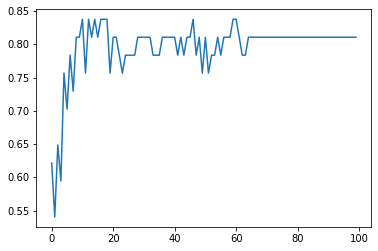

In [104]:
#Graficar scores
plt.plot(scores)

**TODO11** ¿Qué se puede concluir a partir de la gráfica anterior?

Puedo concluir que entre menor es el número de k, hay un menor porcentaje de precisión. Al rededor de k=20 y mayor a este se mantiene una precisión mayor al 75%.

**TODO12:** Determinar si las siguientes afirmaciones son verdaderas o falsas. Justificar su respuesta.

- El error en el test set de 1-NN siempre será menor o igual que el de 5-NN.  

Falso, No necesariamente bajo un copnjunto de datos, por ejemplo, de n clases en la cual hallan 2n muestras y las muestras de clases vengan de pares y esten lo suficientemente separado se obtendra una accuracy perfecta mientras al subir el n empeorara. Depende de los datos que se tengan.

- El tiempo para clasificar una muestra del testset con k-NN crece con el tamaño del train set. 

Verdadero, Porque tiene mayor cantidad de vecinos en los que buscar y así predecir, por lo tanto a mayor tamaño del K-NN el tiempo para clasificar sera mayor.

## Titanic dataset usando pesos en la distancia.

A continuación usamos clasificadores de KNN dándole pesos a las distancias. 

**TODO13:** ¿Nota alguna diferencia con la clasificación sin pesos en las distancias? ¿Alguna hipótesis sobre el porqué?

In [105]:
# Weighted k-nn
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train,y_train)
  s=knn.score(X_test,y_test)
  scores.append(s)
  print(s)

0.6216216216216216
0.5945945945945946
0.6486486486486487
0.6486486486486487
0.7027027027027027
0.6756756756756757
0.7027027027027027
0.7297297297297297
0.7297297297297297
0.7297297297297297
0.7567567567567568
0.7837837837837838
0.7567567567567568
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837837838
0.7837837837

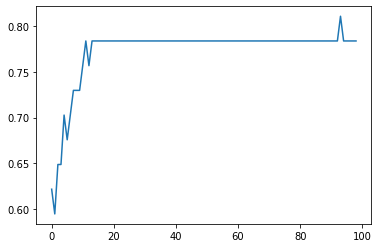

In [106]:
#Graficar
plt.plot(scores)

TODO13: ¿Nota alguna diferencia con la clasificación sin pesos en las distancias? 
    
Si hay diferencias, las graficas muestran que la clasificación sin pesos oscila mas es decir no es muy constante, mientras que la clasificación con pesos no oscila tanto y tiene valores constantes, podemos observar que alrededor de k=20 y mayor es constante en 0.78 en su gran mayoria, mientras que en la otra grafica es muy variable solo podia concluir que tenian una precisión mayor al 0.75, sin embargo ambas graficas mantienen la misma tendencia. 

¿Alguna hipótesis sobre el porqué?

Cuando se toma en cuenta el valor de los pesos se esta aplicando una transformación suave por lo cual tiende a quitar los picos y las oscilaciones.